# LightGBMs

- [Online Course](https://www.trainindata.com/p/machine-learning-interpretability)

Here I show a model for regression, but it's the same code, apart from the model, if you want to do classification.

In case you have problems importing lightGBMs check out [this solution](https://stackoverflow.com/questions/76610527/cannot-import-lightgbm-error-with-pandas).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from lightgbm import LGBMRegressor

### Load data

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X = X.drop(columns=["Latitude", "Longitude"])

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


### Visualize data

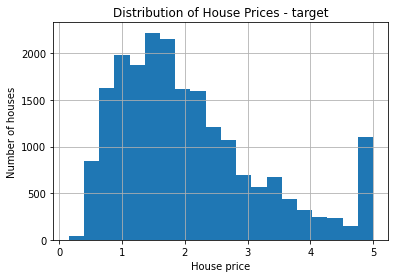

In [3]:
# Display the target distribution

y.hist(bins=20)
plt.xlabel("House price")
plt.ylabel("Number of houses")
plt.title("Distribution of House Prices - target")
plt.show()

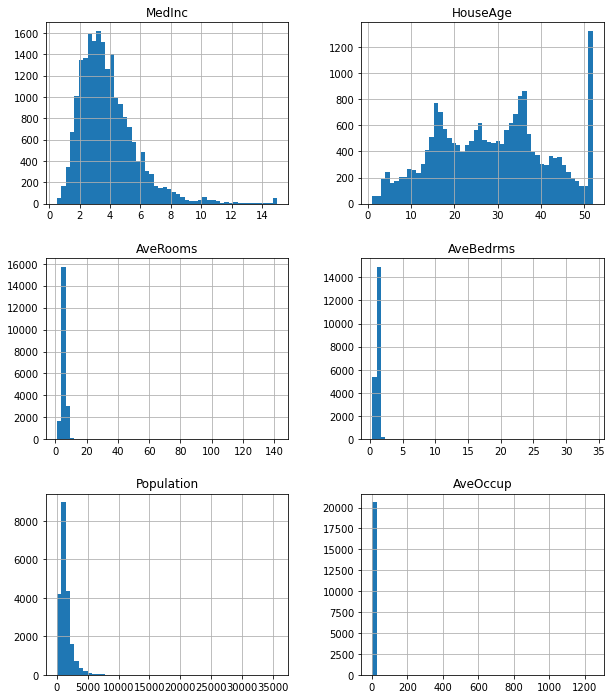

In [4]:
# Display the variables distribution

X.hist(bins=50, figsize=(10, 12))
plt.show()

### Split data

In [5]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((14448, 6), (6192, 6))

## LightGBM

In [6]:
# fit model

gbm = LGBMRegressor(
    importance_type="gain",
    n_estimators=50,
    max_depth=3,
    random_state=3,
)

gbm.fit(X_train, y_train)

LGBMRegressor(importance_type='gain', max_depth=3, n_estimators=50,
              random_state=3)

In [7]:
# R2 in train set

gbm.score(X_train, y_train)

0.6894128304675271

In [8]:
# R2 in test set

gbm.score(X_test, y_test)

0.6617790061575908

The model explains more than 60% of the variability in the target variable.

## Global explanations - feature importance

In [9]:
# gbm importance

global_exp = pd.Series(gbm.feature_importances_,
                       index=X_train.columns.to_list())

global_exp

MedInc        51542.712450
HouseAge       4825.038389
AveRooms       2651.801626
AveBedrms       446.038274
Population      238.447376
AveOccup      10063.782245
dtype: float64

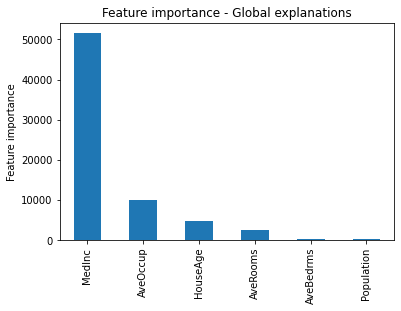

In [10]:
global_exp.sort_values(ascending=False).plot.bar()
plt.ylabel("Feature importance")
plt.title("Feature importance - Global explanations")
plt.show()

Let's compare the results with a different importance calculation:

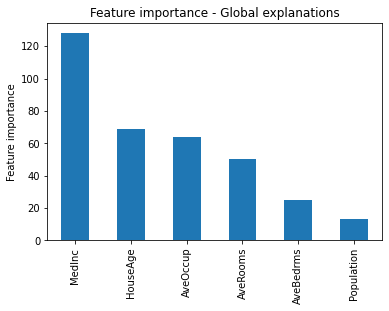

In [11]:
gbm = LGBMRegressor(
    importance_type="split",
    n_estimators=50,
    max_depth=3,
    random_state=3,
)
gbm.fit(X_train, y_train)

global_exp = pd.Series(gbm.feature_importances_, index=X_train.columns.to_list())
global_exp.sort_values(ascending=False).plot.bar()
plt.ylabel("Feature importance")
plt.title("Feature importance - Global explanations")
plt.show()

The different importance metrics reflect different aspects of the ensemble. The gain returns very similar importance values to those returned by sklearn.

The split, which is the number of times a feature was selected at a node, give an alternative view of the effect of that feature on the ensemble.